In [1]:
import tensorflow as tf
import numpy as np

In [2]:
import pandas as pd

In [3]:
import random
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.utils import shuffle

# Создаю выборку

In [6]:
x_x_train = [random.uniform(-1,1) for i in range(100000)]
x_y_train = list(np.array(x_x_train)**2)
y_train = list(np.ones(100000, dtype=int))

In [7]:
x_x_train_u = [random.uniform(-1,1) for i in range(100000)]
x_y_train_u = [random.uniform(0,1) for i in range(100000)]
y_train_u = list(np.zeros(100000, dtype=int))

In [8]:
x_x_train.extend(x_x_train_u)
x_y_train.extend(x_y_train_u)
y_train.extend(y_train_u)

In [9]:
d={'x':x_x_train, 'y':x_y_train, 'label':y_train}

In [10]:
df = pd.DataFrame(d)

In [11]:
df = df.reindex(np.random.permutation(df.index))

In [12]:
df['x'][df.label==1]

6823    -0.652755
87184   -0.263454
14246    0.143909
61678    0.311003
86901    0.145468
           ...   
46358   -0.334623
92278    0.540953
57266    0.820749
17878   -0.578781
44418    0.420257
Name: x, Length: 100000, dtype: float64

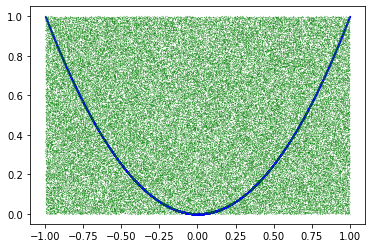

In [13]:
plt.scatter(df['x'][df.label==1],df['y'][df.label==1], s=0.001, c= 'blue')
plt.scatter(df['x'][df.label==0],df['y'][df.label==0], s=0.01, c= 'green')

In [14]:
X=[]
for x,y in zip(df['x'],df['y']):
    X.append([x,y])
Y=list(df['label'])

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [16]:
n_inputs=2
classificator = tf.keras.models.Sequential()
classificator.add(tf.keras.layers.Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
classificator.add(tf.keras.layers.Dense(1, activation='sigmoid'))
classificator.compile(loss='binary_crossentropy', optimizer=tf.train.AdamOptimizer(learning_rate=0.01), metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [17]:
classificator.compile(loss='binary_crossentropy', optimizer=tf.train.AdamOptimizer(learning_rate=0.01), metrics = ['accuracy'])

In [18]:
classificator.fit(np.reshape(X_train, (134000,2)), Y_train, epochs=2)

Instructions for updating:
Use tf.cast instead.
Epoch 1/2
134000/134000 [==============================] - 23s 171us/sample - loss: 0.2771 - acc: 0.8992
Epoch 2/2
134000/134000 [==============================] - 21s 156us/sample - loss: 0.1786 - acc: 0.9401


In [19]:
classificator.predict(np.reshape([0,1], (1,2)))

array([[1.4498459e-09]], dtype=float32)

In [20]:
classificator.evaluate(np.reshape(X_test, (66000,2)), Y_test)

66000/66000 [==============================] - 7s 105us/sample - loss: 0.1553 - acc: 0.9477


[0.15531939876260178, 0.9476515]

In [21]:
latent_dim=5
n_outputs=2
generator=tf.keras.models.Sequential()
generator.add(tf.keras.layers.Dense(15, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
generator.add(tf.keras.layers.Dense(n_outputs, activation='linear'))

In [22]:
def define_gan(generator, discriminator):
    # make weights in the discriminator not trainable
    discriminator.trainable = False
    # connect them
    model = tf.keras.models.Sequential()
    # add generator
    model.add(generator)
    # add the discriminator
    model.add(discriminator)
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model

In [23]:
def change_discriminator(gan,discriminator):
    # make weights in the discriminator not trainable
    discriminator.trainable = False
    # connect them
    model = tf.keras.models.Sequential()
    # add generator
    model.add(gan.layers[0])
    # add the discriminator
    model.add(discriminator)
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model
    

In [24]:
def train_gan(generator,discriminator, n_epochs, gan=0):
    if gan==0:
        gan = define_gan(generator,classificator)
    for x in range(n_epochs):
        x_gan = [[random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1)] for i in range(100000)]
        gan.fit(np.reshape(x_gan, (100000,5)),epochs=1)
        activation_model = tf.keras.Model(inputs = gan.layers[0].input, outputs = gan.layers[0].output)
        preds = activation_model.predict(np.reshape(x_gan, (100000,5)))
        t_x = np.copy(X_train)
        t_y = np.copy(Y_train)
        t_x = np.concatenate([t_x,preds])
        t_y = np.concatenate([t_y,np.zeros(100000,dtype=int)])
        t_x, t_y = shuffle([t_x, t_y])
        classificator.fit(np.reshape(t_x, (234000,2)), t_y,epochs=2)
        gan = change_discriminator(gan, classificator)
        x_gan = [[random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1)] for i in range(100000)]
        gan.fit(np.reshape(x_gan, (100000,5)),epochs=1)
    return gan
    

In [ ]:
x_gan = [[random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1)] for i in range(100000)]
preds = activation_model.predict(np.reshape(x_gan, (100000,5)))

In [ ]:
len(preds)

In [ ]:
len(X_train)

In [ ]:
t_x = np.copy(X_train)
t_y = np.copy(Y_train)

In [ ]:
np.concatenate([t_x,preds]).shape

In [25]:
gan=define_gan(generator,classificator)

In [33]:
gan = train_gan(generator=generator,discriminator=classificator,n_epochs=5,gan=gan)

100000/100000 [==============================] - 19s 189us/sample - loss: 0.0011
Epoch 1/2
234000/234000 [==============================] - 37s 158us/sample - loss: 0.0808 - acc: 0.9766
Epoch 2/2
100000/100000 [==============================] - 17s 173us/sample - loss: 6.8297e-04


ValueError: cannot reshape array of size 234000 into shape (234000,2)

In [29]:
x_gan = [[random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1),random.uniform(-1,1)] for i in range(200000)]

In [ ]:
gan.fit(np.reshape(x_gan, (200000,5)),epochs=3)

In [27]:
activation_model = tf.keras.Model(inputs = gan.layers[0].input, outputs = gan.layers[0].output)

In [30]:
preds = activation_model.predict(np.reshape(x_gan, (200000,5)))

In [31]:
classificator.predict(preds)

array([[0.9980627 ],
       [0.99924576],
       [0.9989991 ],
       ...,
       [0.99908566],
       [0.99658155],
       [0.9942931 ]], dtype=float32)

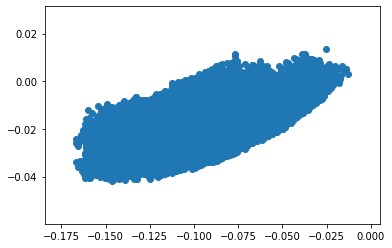

In [32]:
plt.scatter([x[0] for x in preds],[x[1] for x in preds])

In [ ]:
classificator.predict(preds)